```
Let's use the Heart Disease dataset from the UCI Machine Learning Repository. This dataset is widely used in data science projects and contains various attributes that can be used to predict the presence of heart disease in patients.
```

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [30]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=column_names)

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-n

### 1. Data Cleaning:
```
Let's check for missing values and handle them appropriately:
This code handles missing values by replacing '?' with NaN, converts columns to appropriate data types, and imputes missing values with the median. It also checks for outliers using box plots.
```

In [31]:
# Check for missing values
print(df.isnull().sum())

# Replace '?' with NaN
df = df.replace('?', np.nan)

# Convert columns to appropriate data types
df = df.astype({'age': float, 'sex': float, 'cp': float, 'trestbps': float, 
                'chol': float, 'fbs': float, 'restecg': float, 'thalach': float,
                'exang': float, 'oldpeak': float, 'slope': float, 'ca': float, 
                'thal': float, 'target': float})

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check if there are any remaining missing values
print(df_imputed.isnull().sum())

# Display summary statistics
print(df_imputed.describe())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.0000

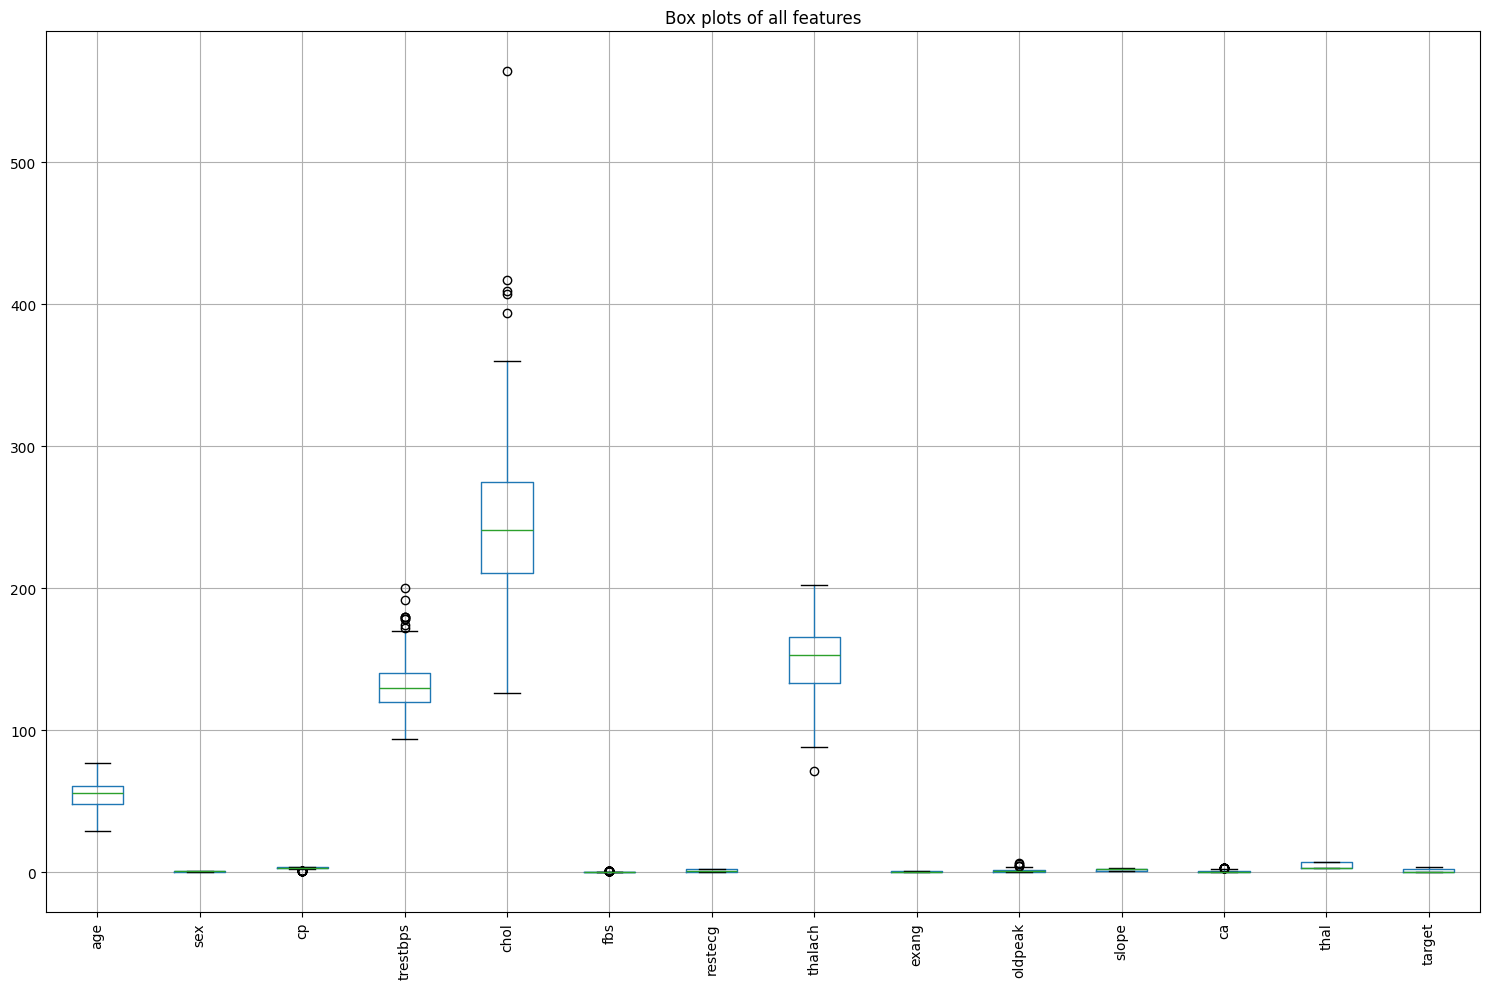

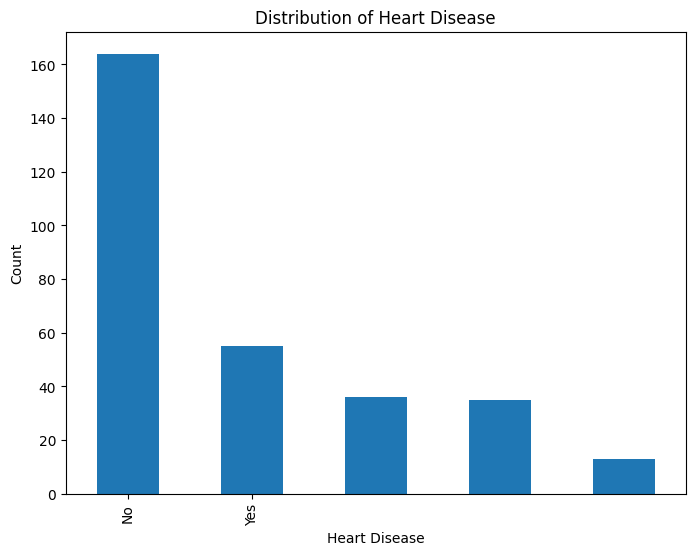

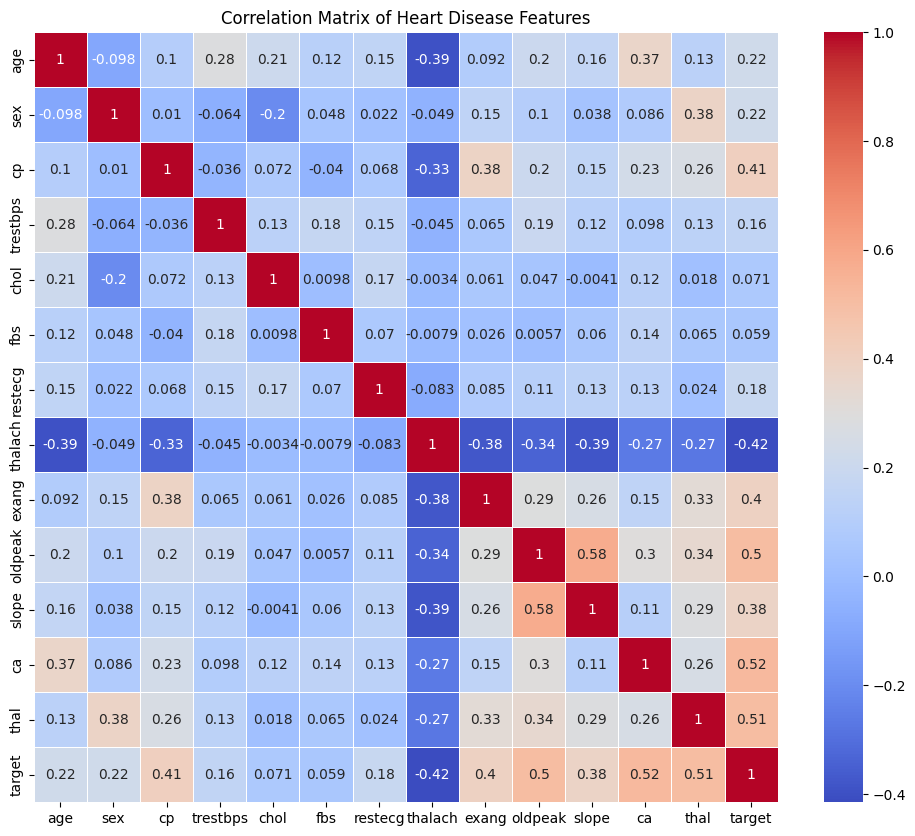

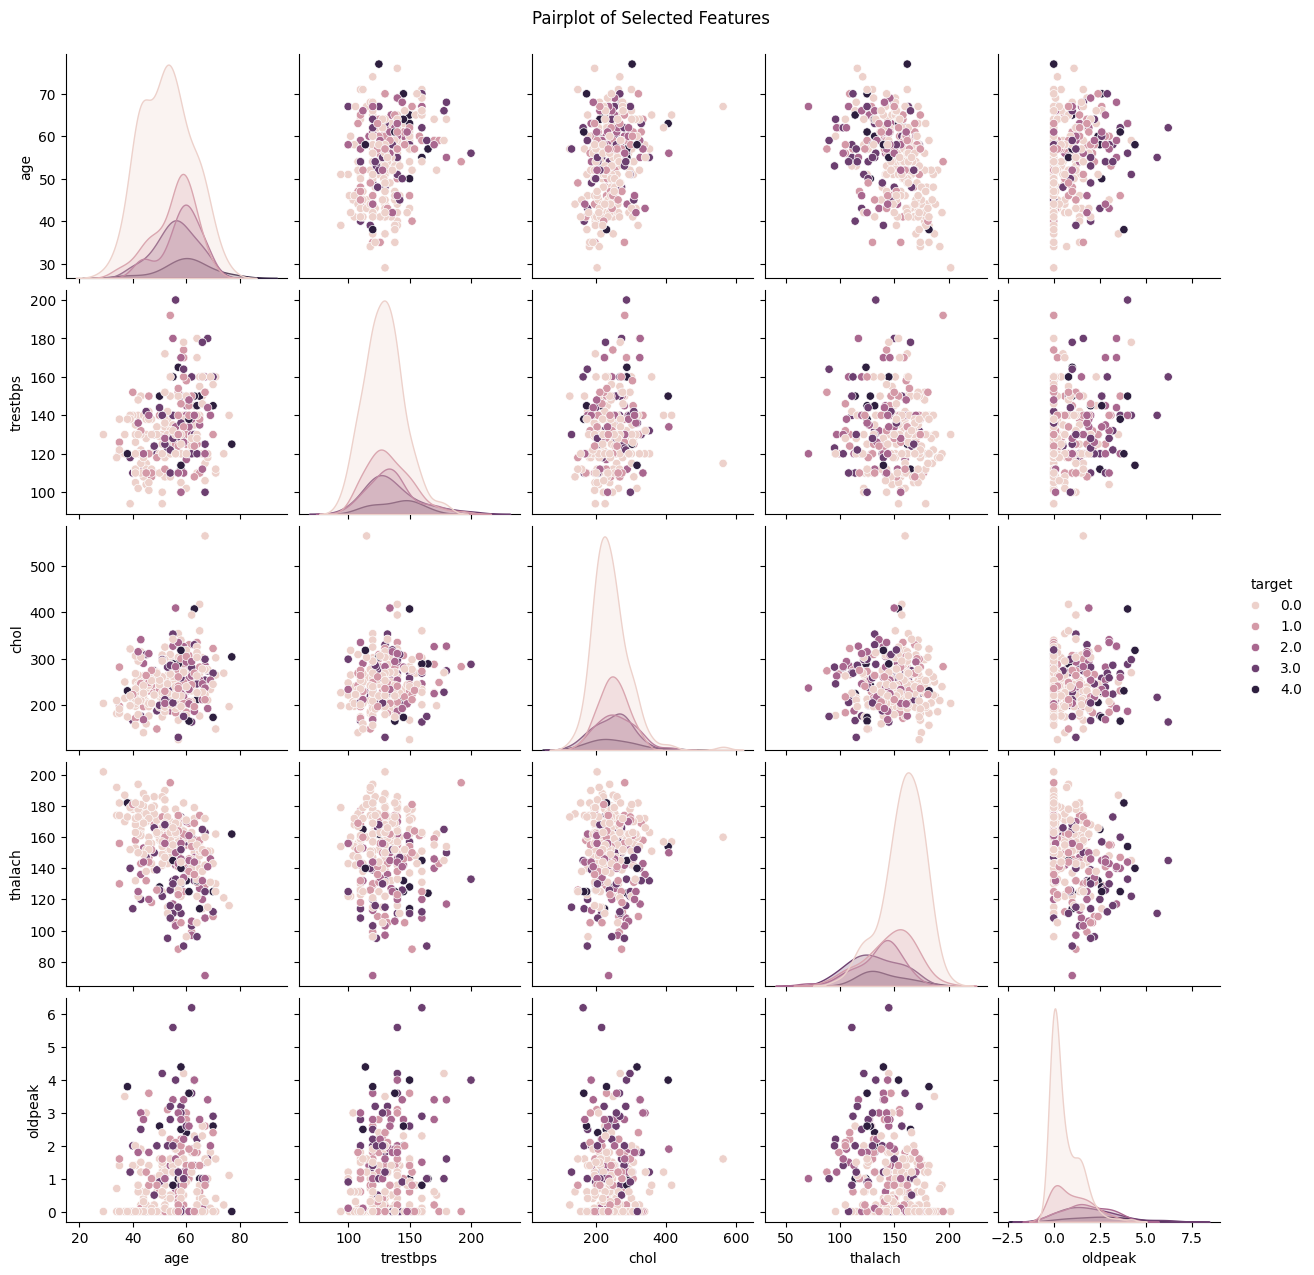

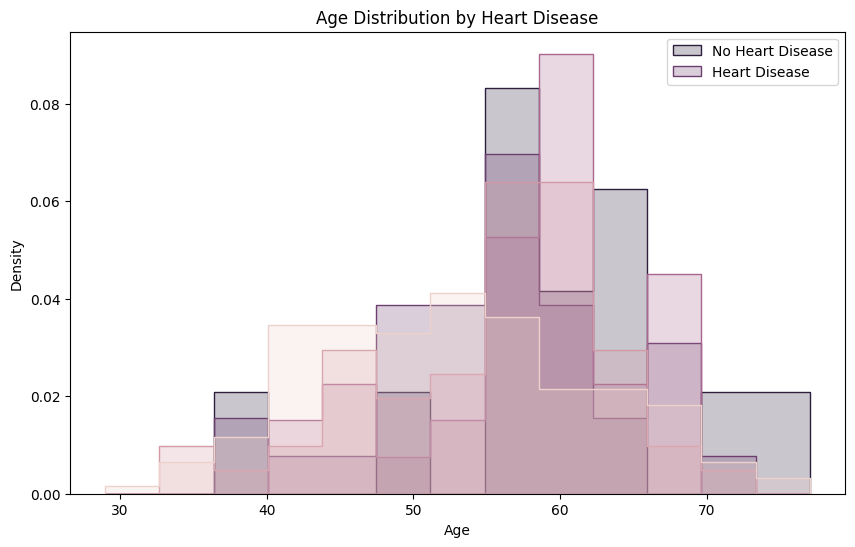

In [32]:
# Check for outliers using box plots
plt.figure(figsize=(15, 10))
df_imputed.boxplot()
plt.title('Box plots of all features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution of target variable
plt.figure(figsize=(8, 6))
df_imputed['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

# Pairplot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df_imputed[selected_features], hue='target')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Age distribution by heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df_imputed, x='age', hue='target', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

### 2. Exploratory Data Analysis (EDA):
```
Let's perform some exploratory data analysis to understand the distribution of data and relationships between variables:
This code creates visualizations to explore the distribution of the target variable, correlations between features, relationships between selected features, and the age distribution by heart disease status.
```

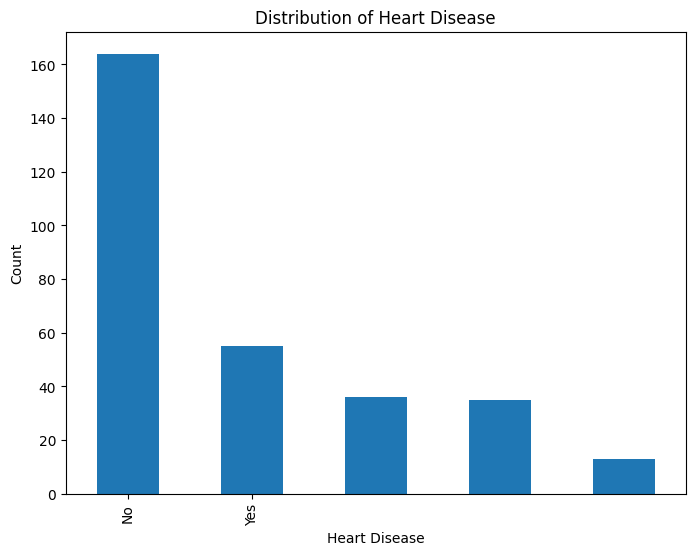

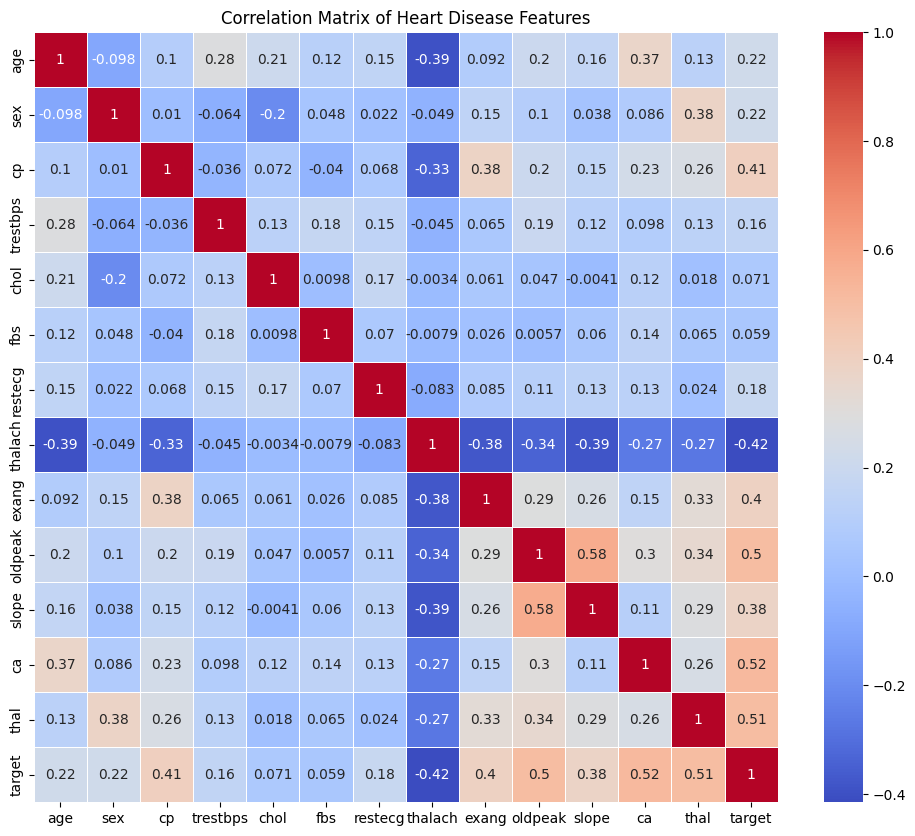

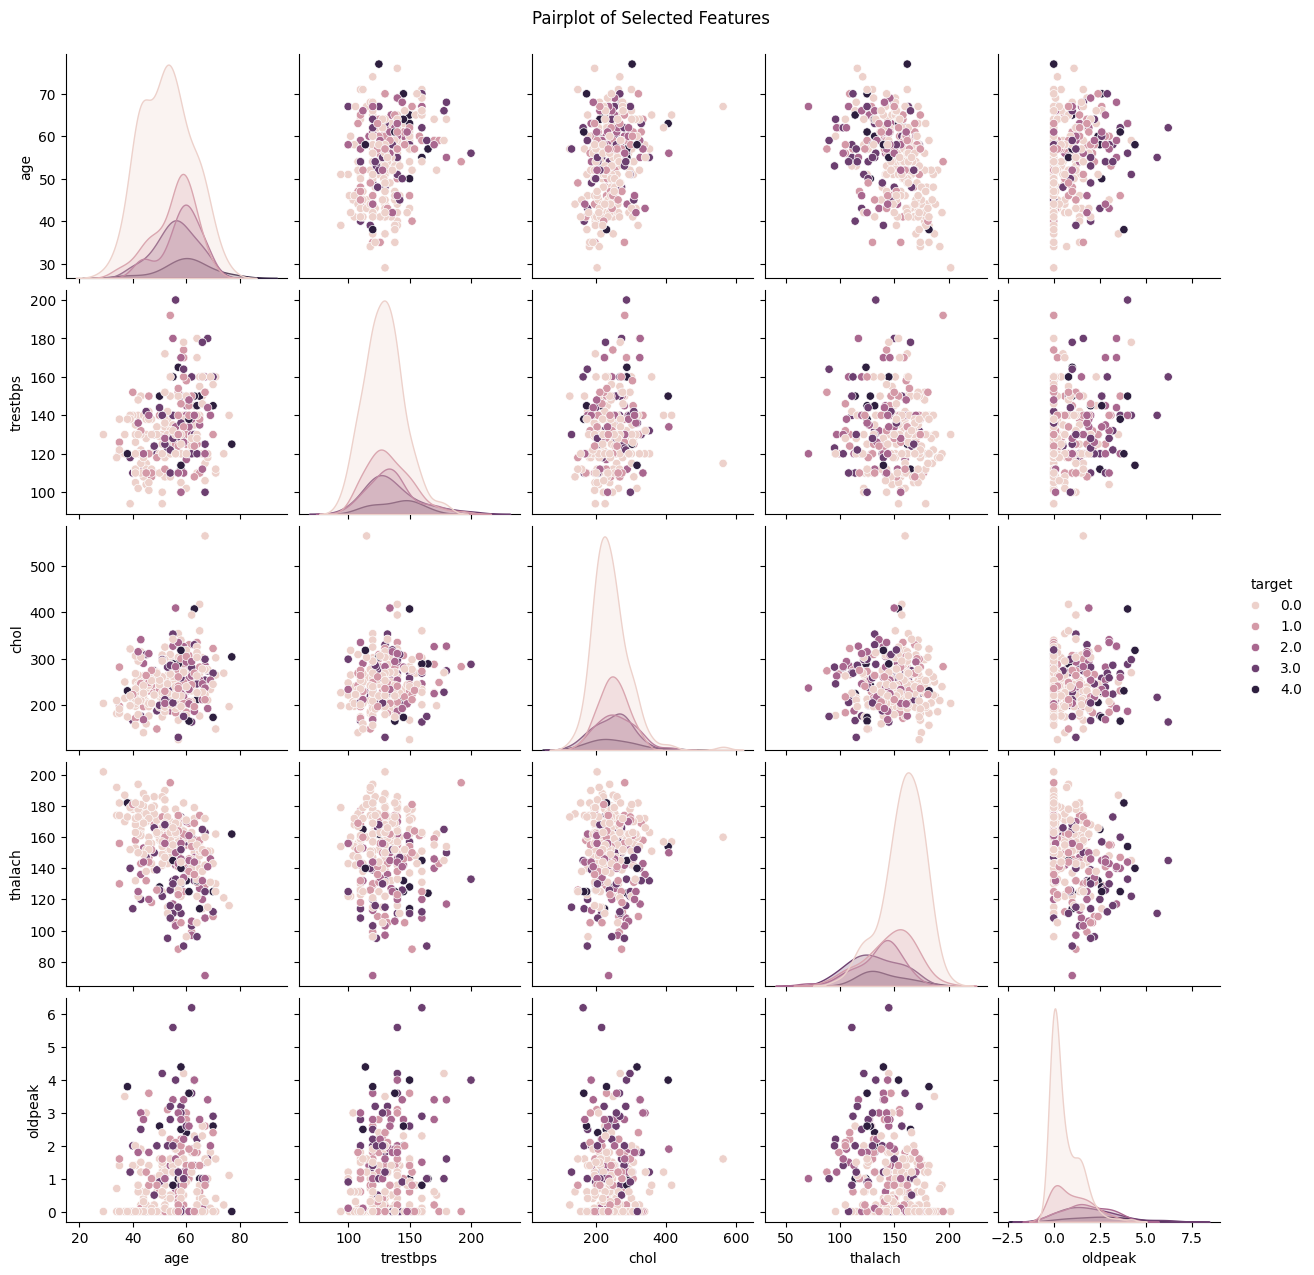

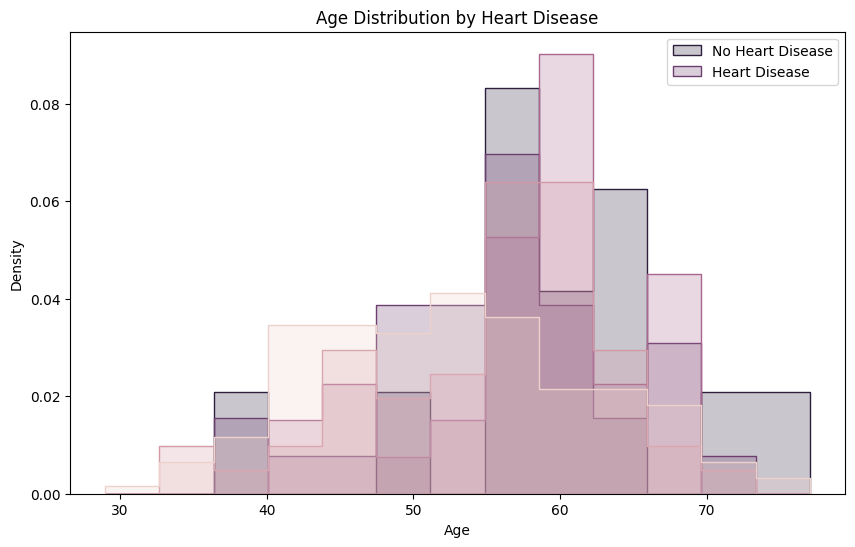

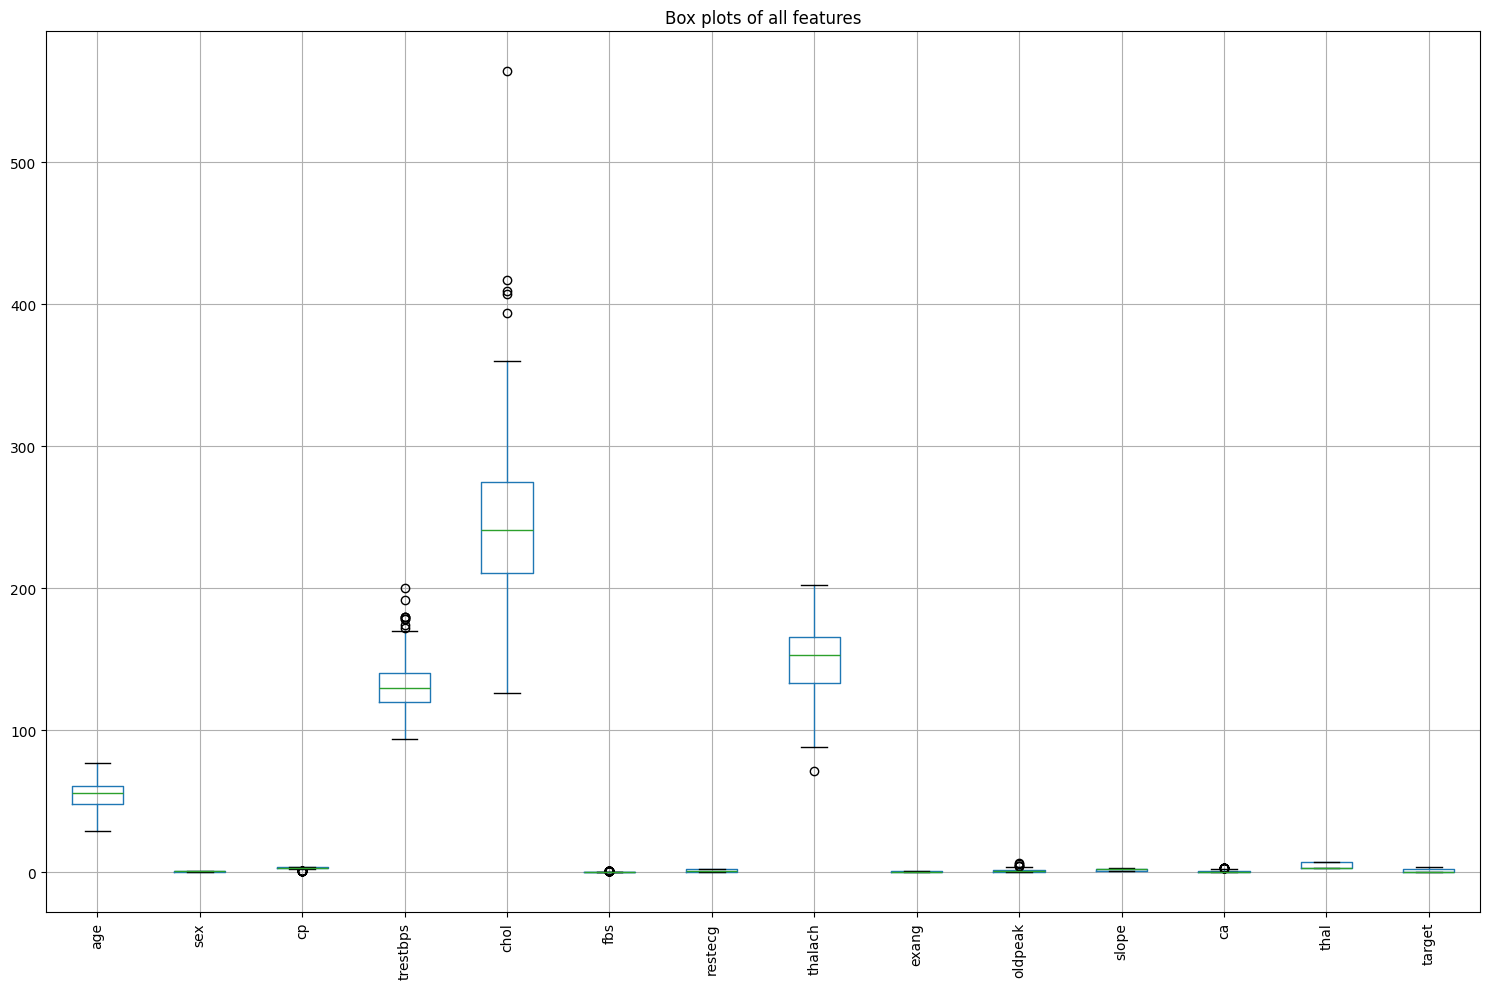

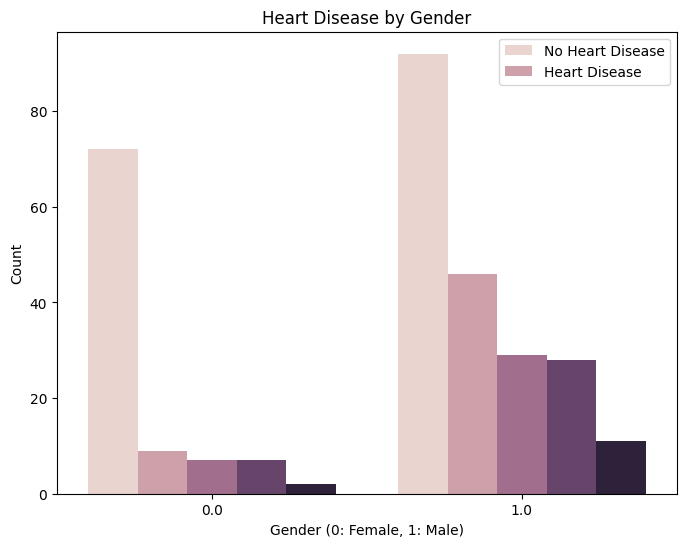

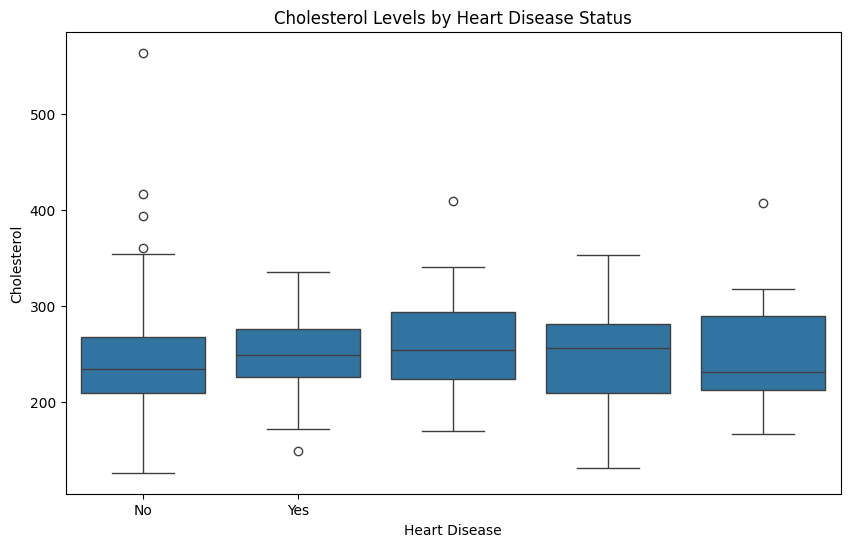

In [35]:
# Assuming df_imputed is our cleaned dataframe

# 1. Distribution of target variable
plt.figure(figsize=(8, 6))
df_imputed['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 2. Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

# 3. Pairplot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df_imputed[selected_features], hue='target')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# 4. Age distribution by heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df_imputed, x='age', hue='target', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# 5. Box plot of numerical features
plt.figure(figsize=(15, 10))
df_imputed.boxplot()
plt.title('Box plots of all features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 6. Categorical feature analysis: Sex vs Target
plt.figure(figsize=(8, 6))
sns.countplot(data=df_imputed, x='sex', hue='target')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# 7. Numerical feature analysis: Cholesterol vs Target
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_imputed, x='target', y='chol')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### 3. Question Formulation and Analysis:
```
Now, let's formulate and answer at least 7 questions related to heart disease using our dataset:
These visualizations help us answer the formulated questions and provide insights into the relationships between various factors and heart disease.
```

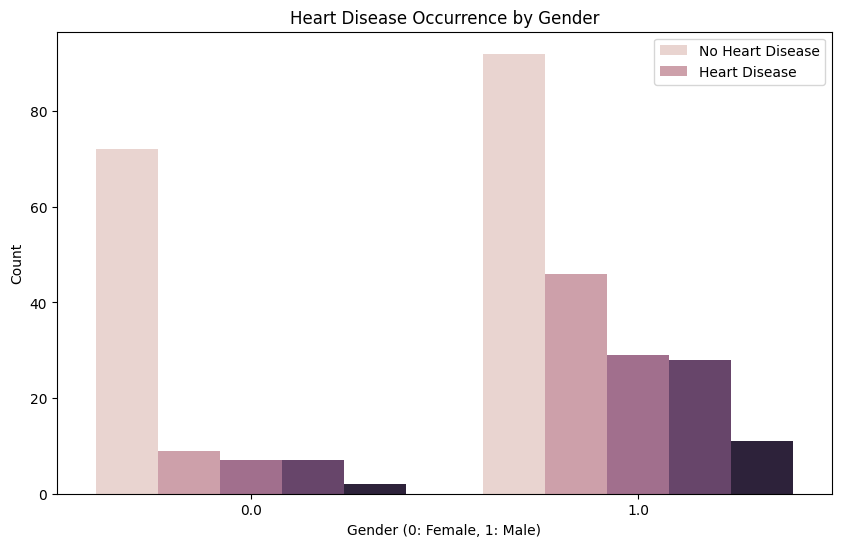

Chi-square statistic: 23.4254
p-value: 0.0001


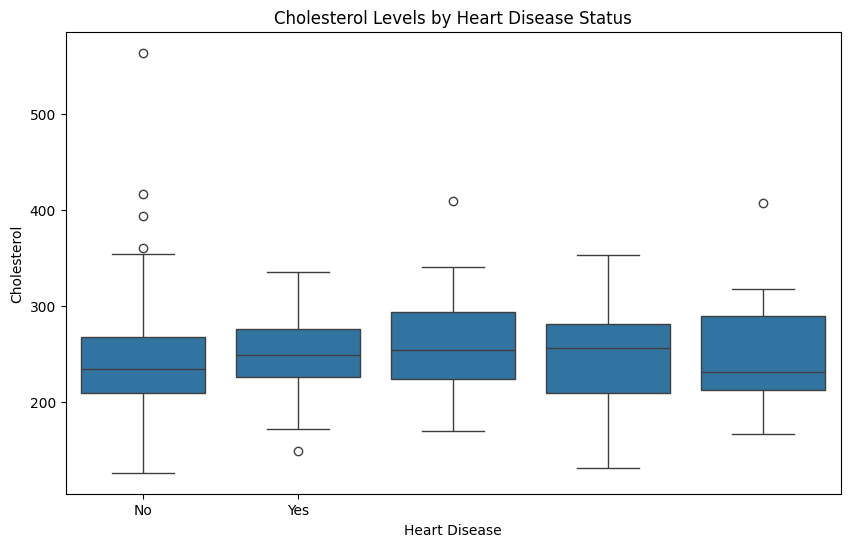

T-statistic: -0.8206
p-value: 0.4128


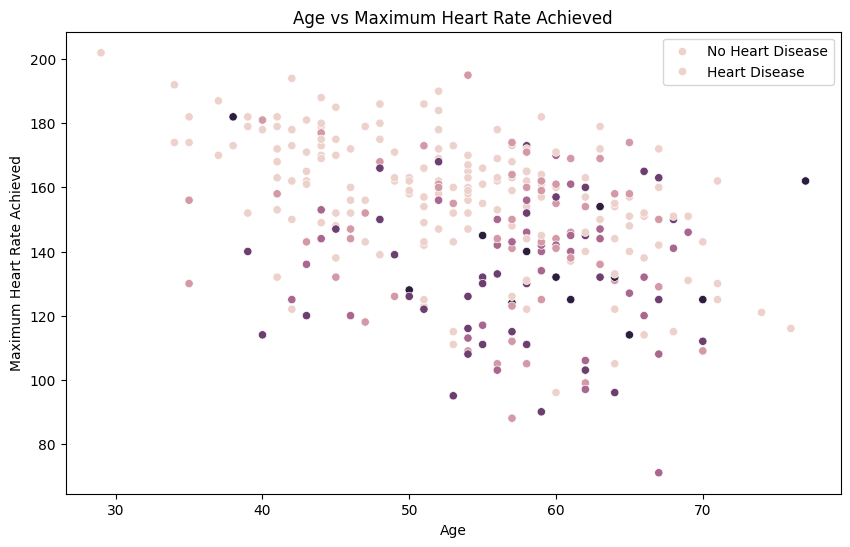

Correlation between age and max heart rate: -0.3938


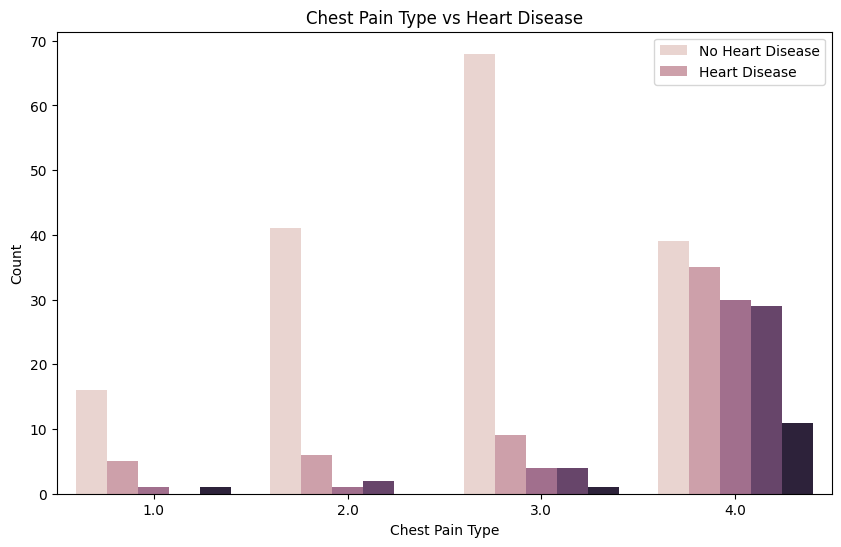

Chi-square statistic: 88.9786
p-value: 0.0000


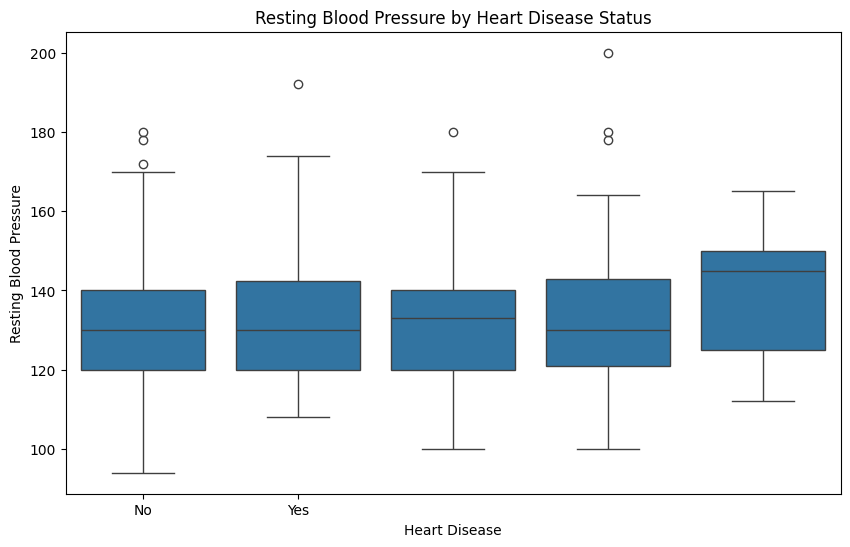

T-statistic: -1.5410
p-value: 0.1248


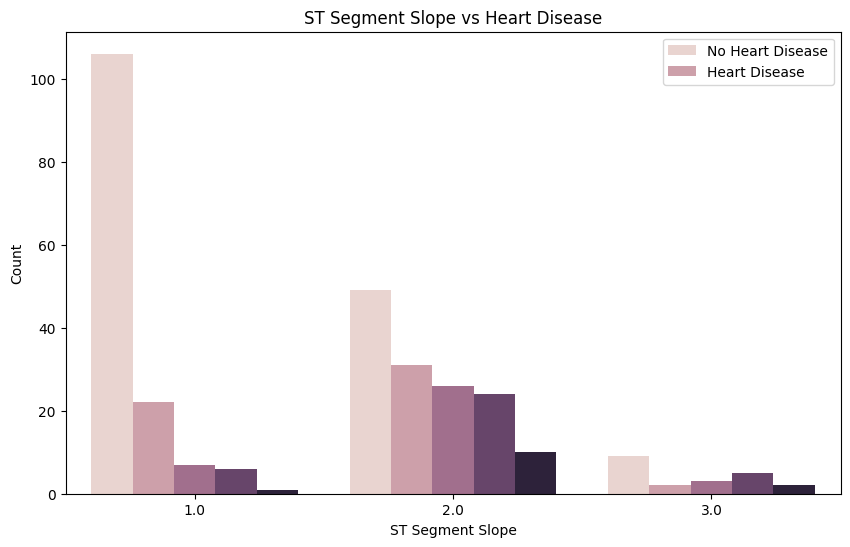

Chi-square statistic: 56.1691
p-value: 0.0000


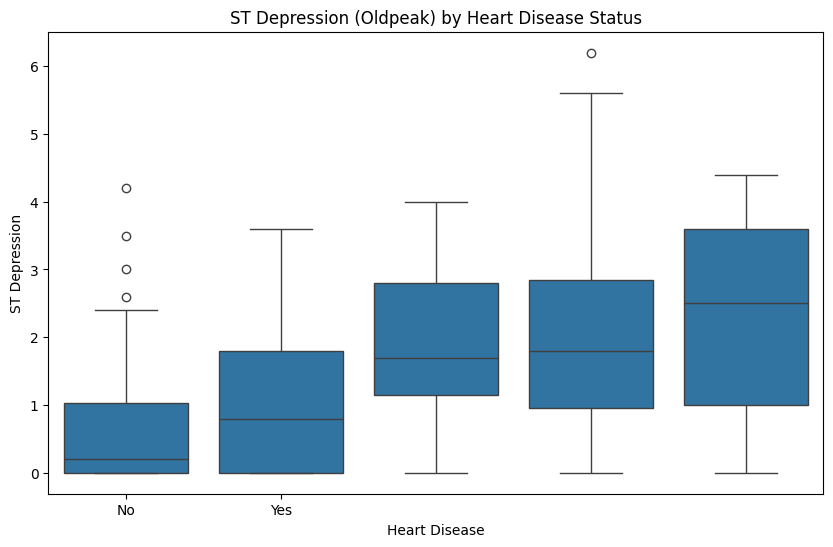

T-statistic: -3.2025
p-value: 0.0016


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df_imputed is our cleaned dataframe

# Question 1: Is there a significant difference in heart disease occurrence between males and females?
plt.figure(figsize=(10, 6))
sns.countplot(data=df_imputed, x='sex', hue='target')
plt.title('Heart Disease Occurrence by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# Chi-square test for independence
chi2, p_value = stats.chi2_contingency(pd.crosstab(df_imputed['sex'], df_imputed['target']))[:2]
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

# Question 2: How does cholesterol level relate to the presence of heart disease?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_imputed, x='target', y='chol')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# T-test for cholesterol levels
t_stat, p_value = stats.ttest_ind(df_imputed[df_imputed['target'] == 0]['chol'], 
                                  df_imputed[df_imputed['target'] == 1]['chol'])
print(f"T-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Question 3: Is there a correlation between age and maximum heart rate achieved?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_imputed, x='age', y='thalach', hue='target')
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

correlation = df_imputed['age'].corr(df_imputed['thalach'])
print(f"Correlation between age and max heart rate: {correlation:.4f}")

# Question 4: How does the type of chest pain relate to heart disease?
plt.figure(figsize=(10, 6))
sns.countplot(data=df_imputed, x='cp', hue='target')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# Chi-square test for independence
chi2, p_value = stats.chi2_contingency(pd.crosstab(df_imputed['cp'], df_imputed['target']))[:2]
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

# Question 5: Is there a relationship between resting blood pressure and heart disease?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_imputed, x='target', y='trestbps')
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# T-test for resting blood pressure
t_stat, p_value = stats.ttest_ind(df_imputed[df_imputed['target'] == 0]['trestbps'], 
                                  df_imputed[df_imputed['target'] == 1]['trestbps'])
print(f"T-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Question 6: How does the slope of the peak exercise ST segment relate to heart disease?
plt.figure(figsize=(10, 6))
sns.countplot(data=df_imputed, x='slope', hue='target')
plt.title('ST Segment Slope vs Heart Disease')
plt.xlabel('ST Segment Slope')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# Chi-square test for independence
chi2, p_value = stats.chi2_contingency(pd.crosstab(df_imputed['slope'], df_imputed['target']))[:2]
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

# Question 7: Is there a significant difference in oldpeak (ST depression) between those with and without heart disease?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_imputed, x='target', y='oldpeak')
plt.title('ST Depression (Oldpeak) by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('ST Depression')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# T-test for oldpeak
t_stat, p_value = stats.ttest_ind(df_imputed[df_imputed['target'] == 0]['oldpeak'], 
                                  df_imputed[df_imputed['target'] == 1]['oldpeak'])
print(f"T-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

### 4. Data Visualization: 
```
Created visualizations using tools like Matplotlib, 
Seaborn, to effectively present the findings and insights gained from the 
analysis. This included charts, graphs, and other visual aids to make the 
results easy to understand. 
```

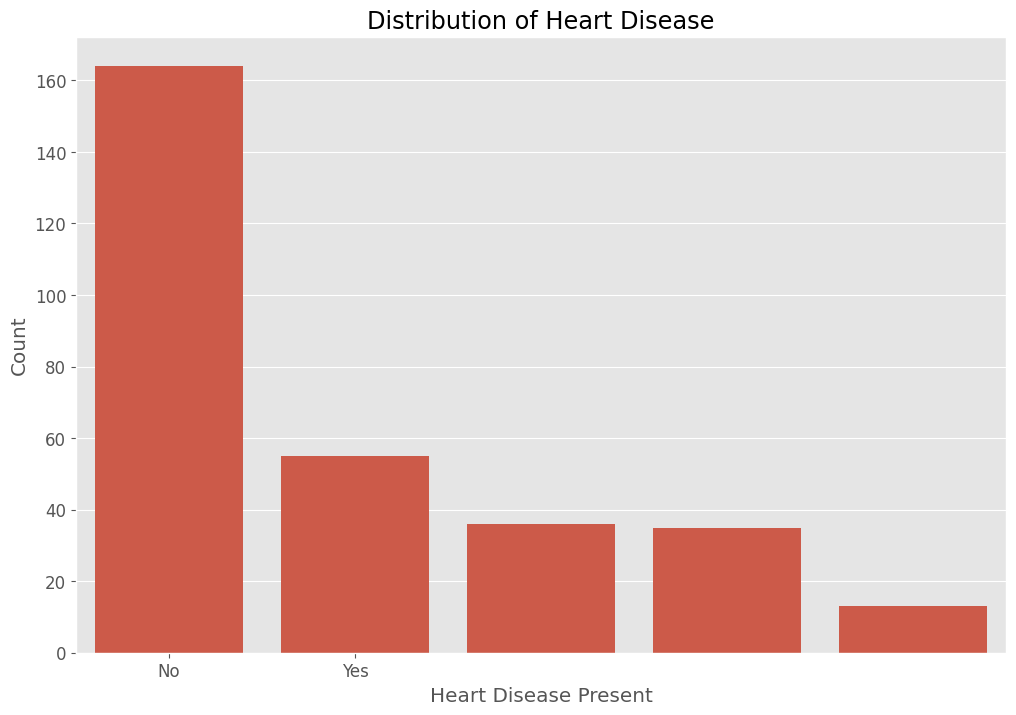

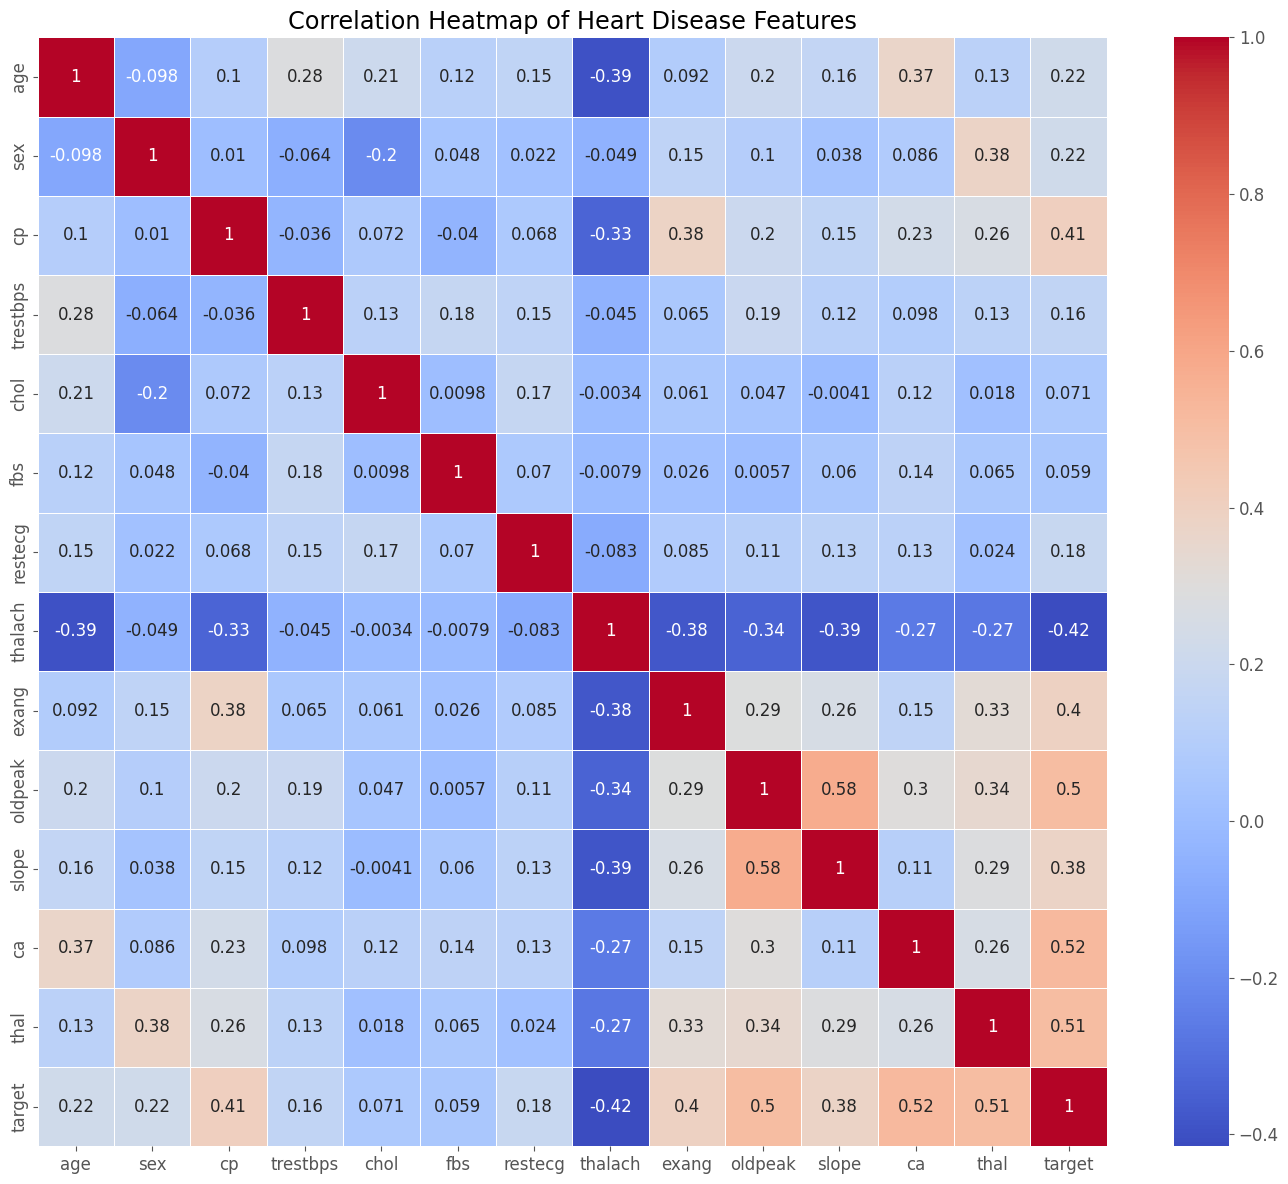

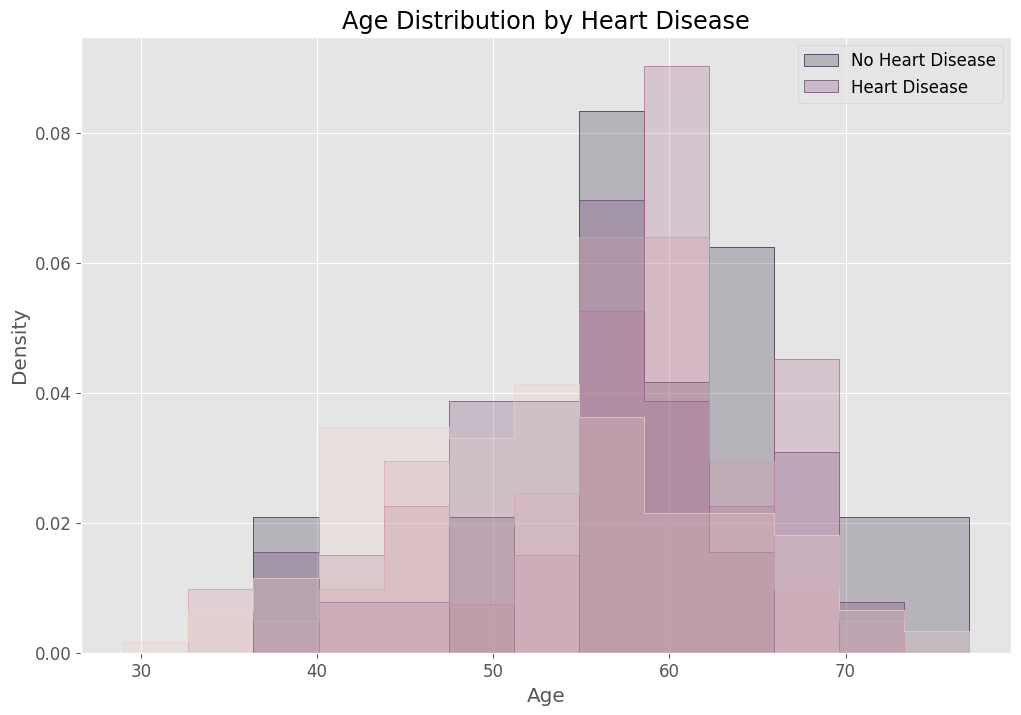

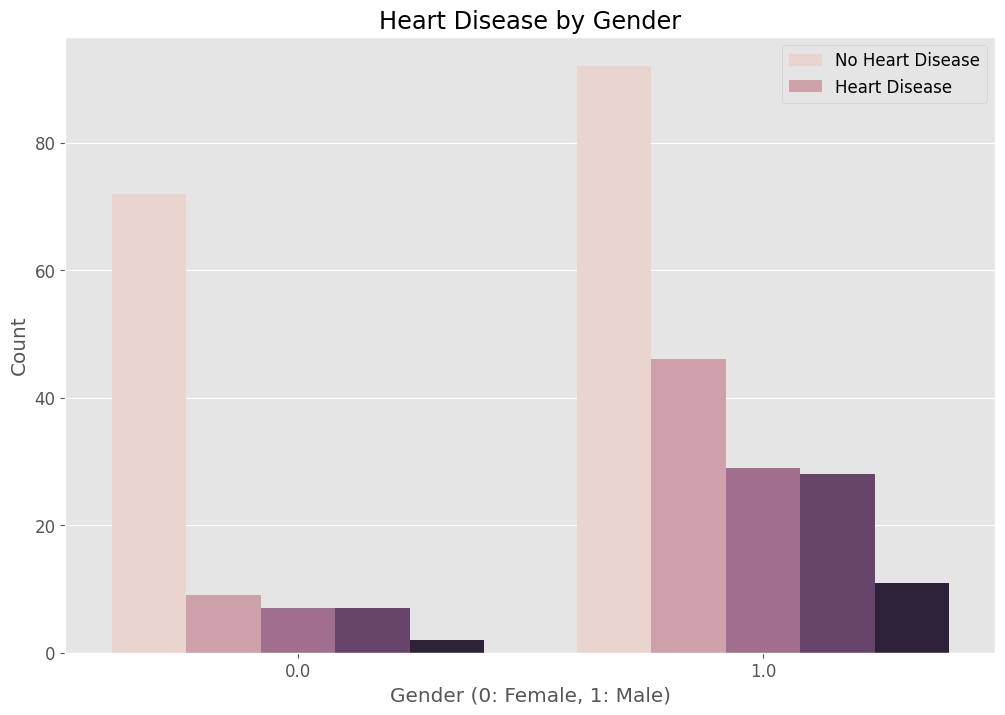

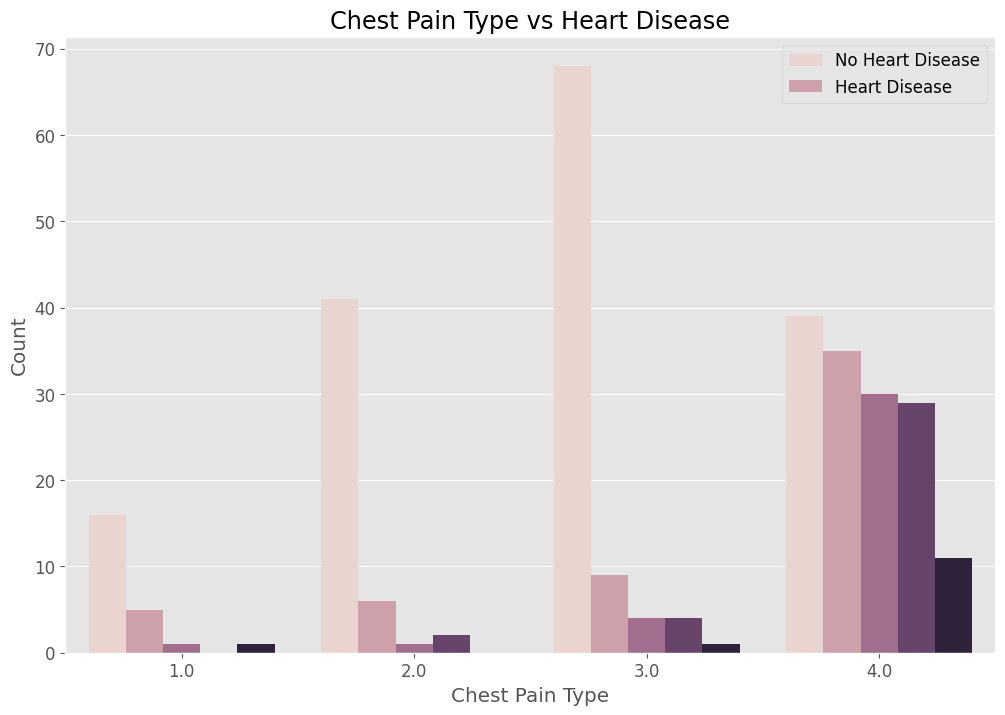

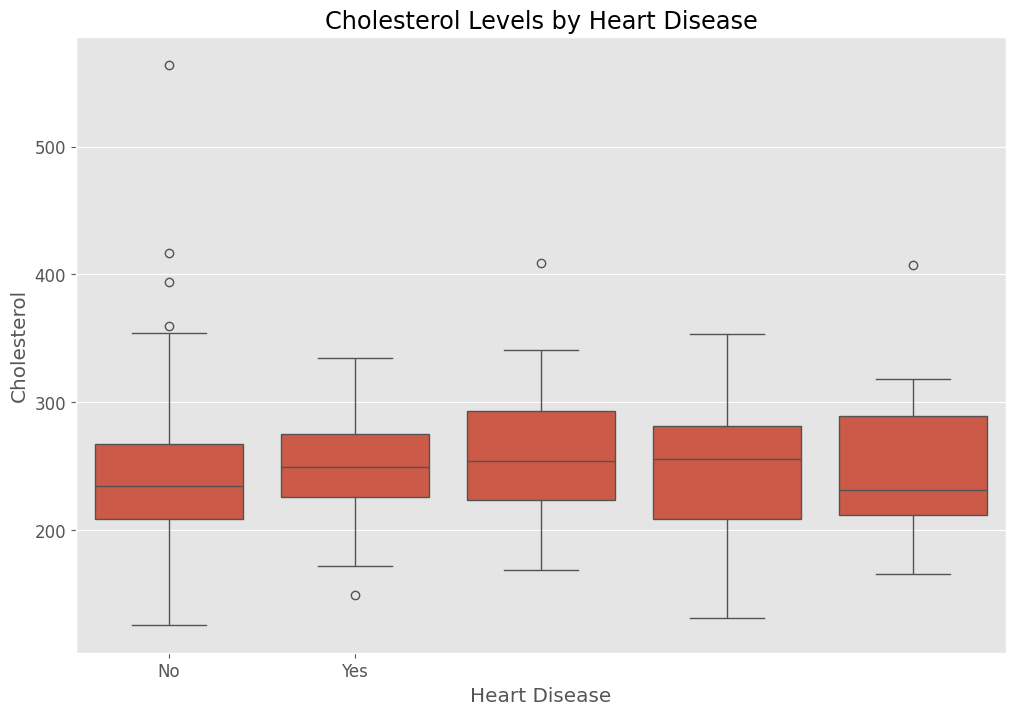

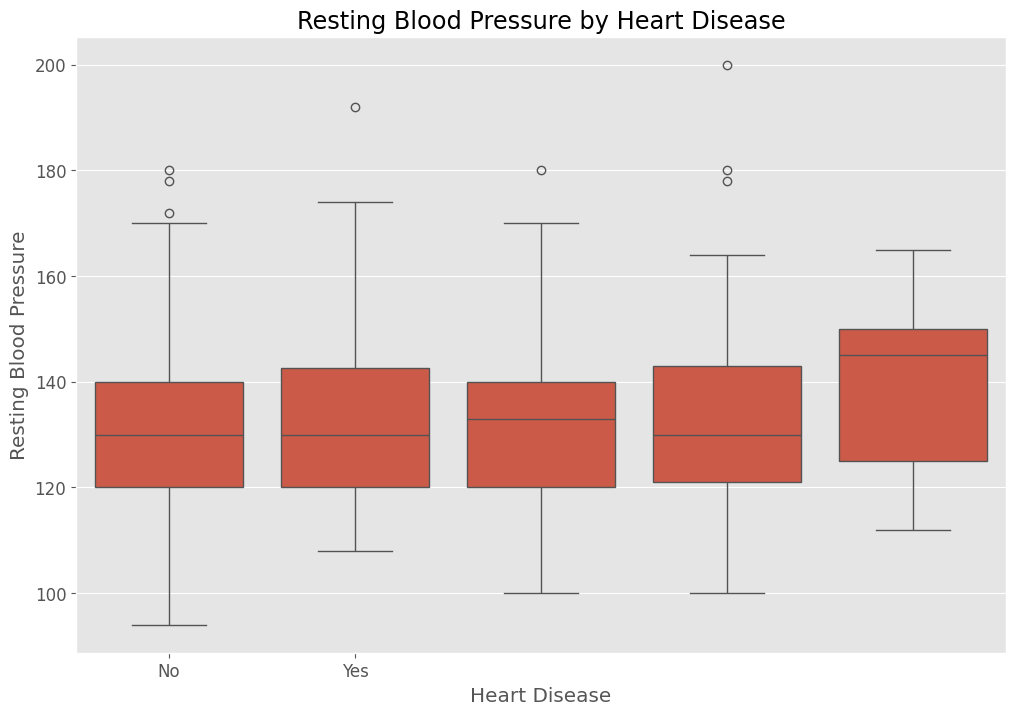

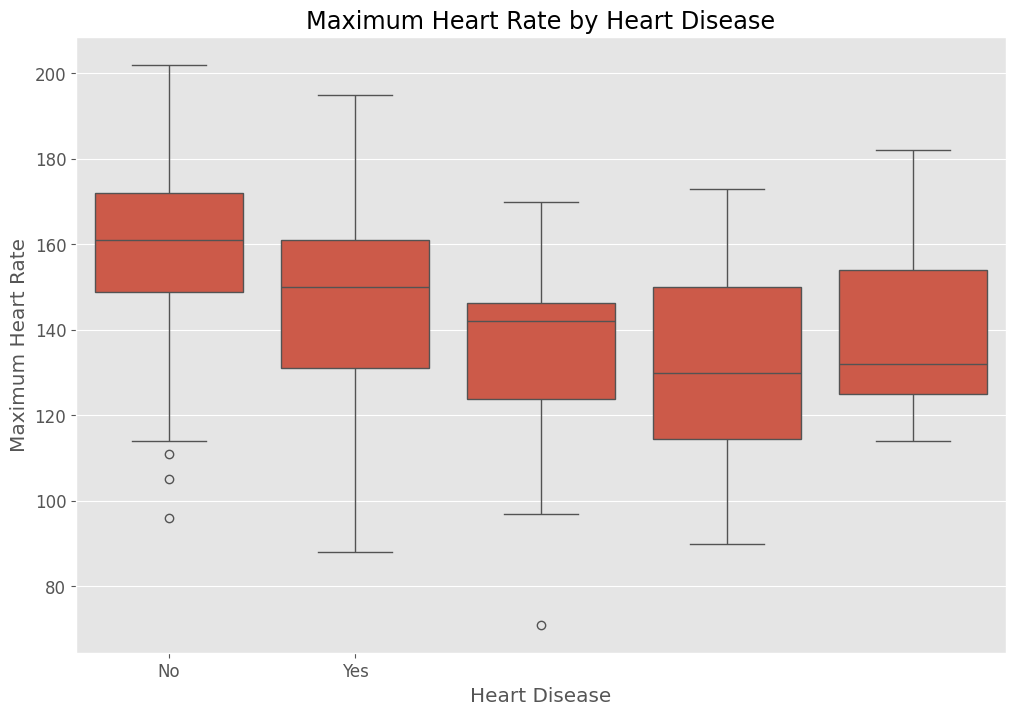

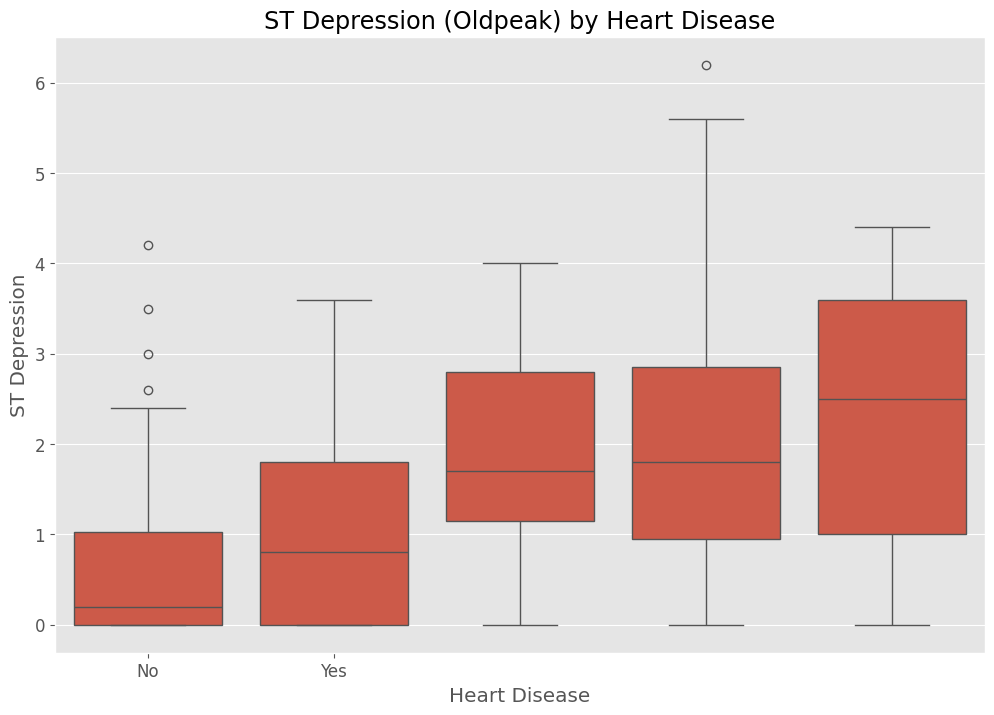

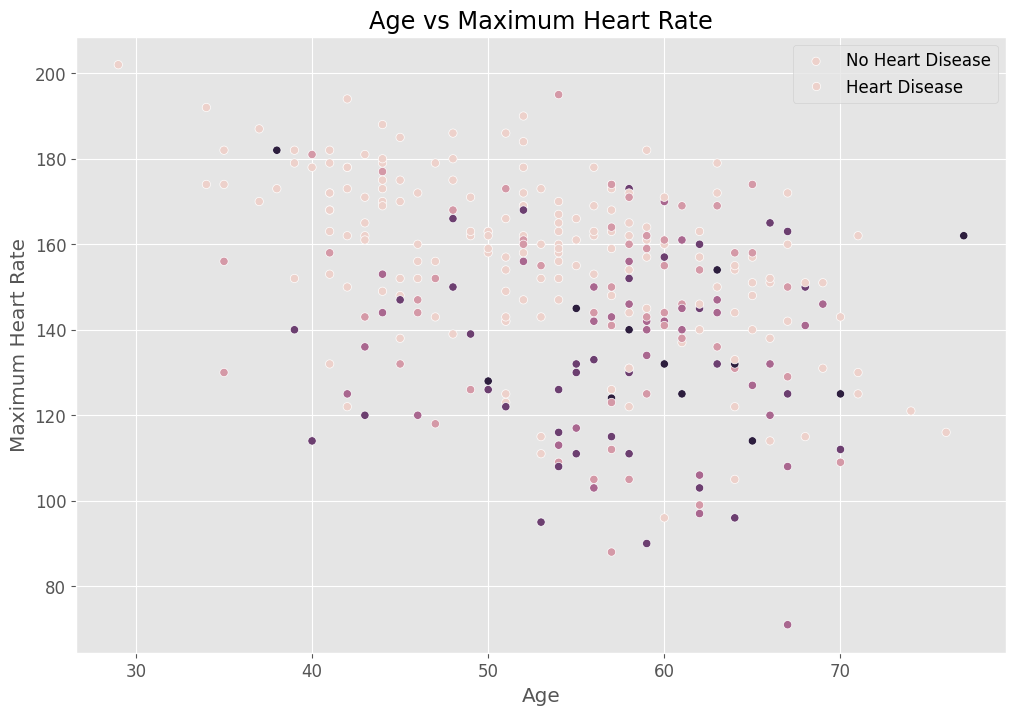

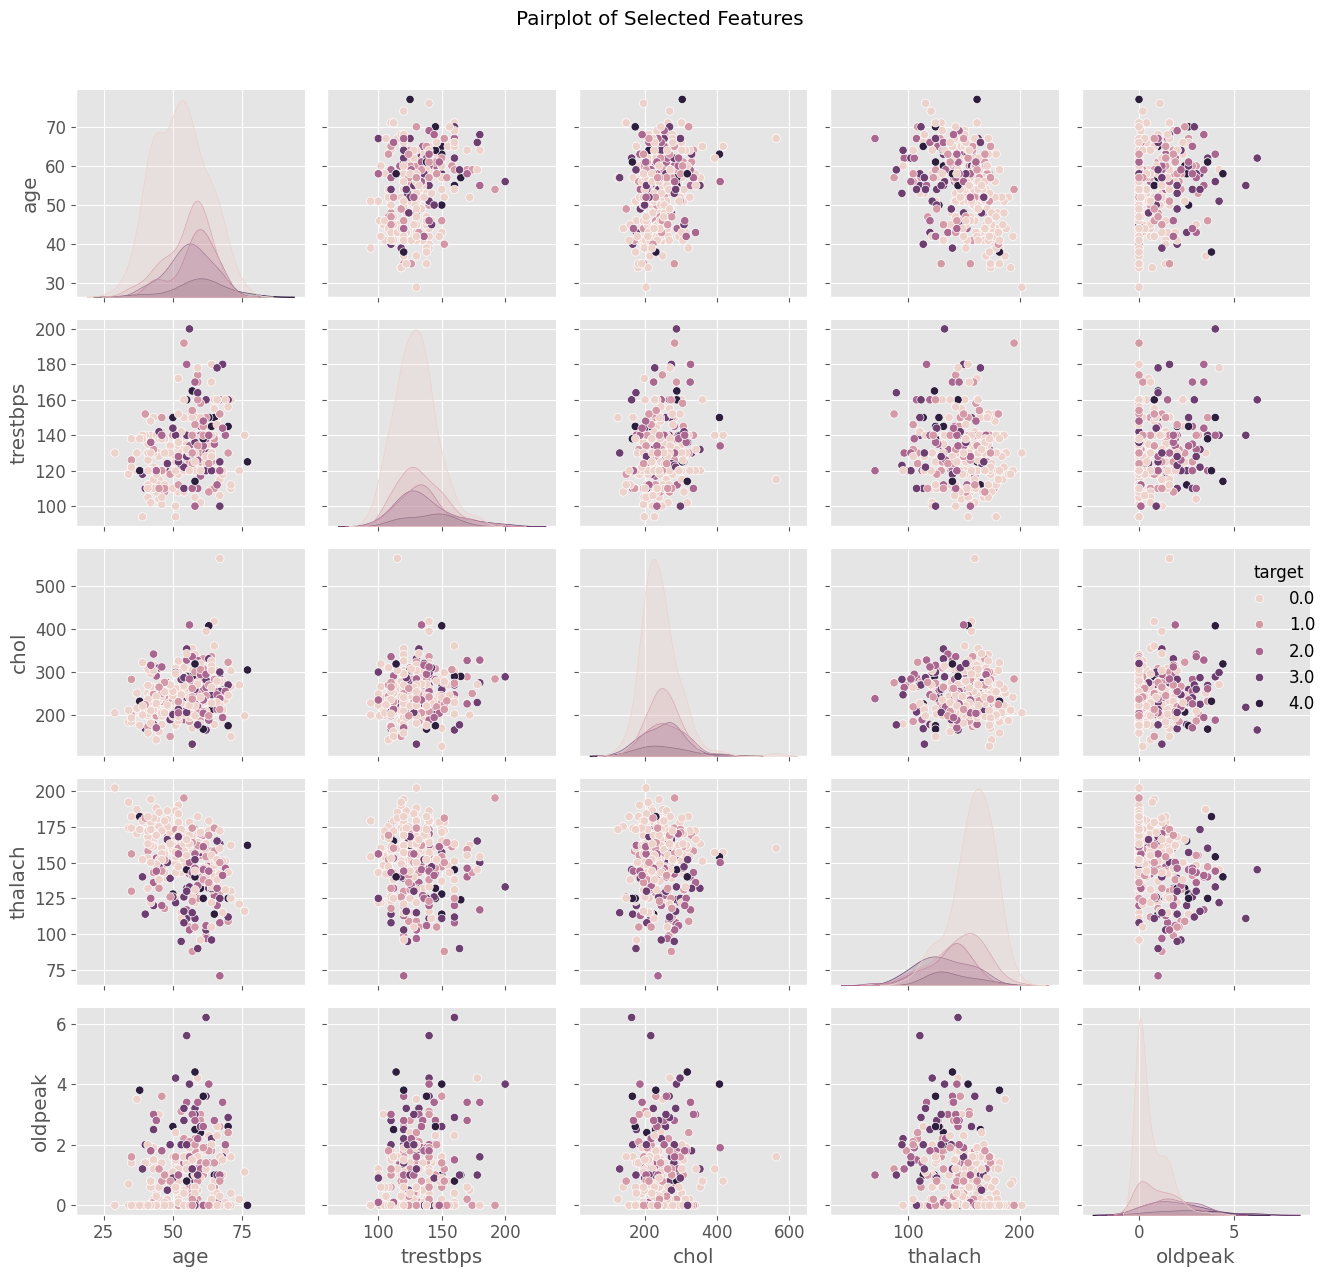

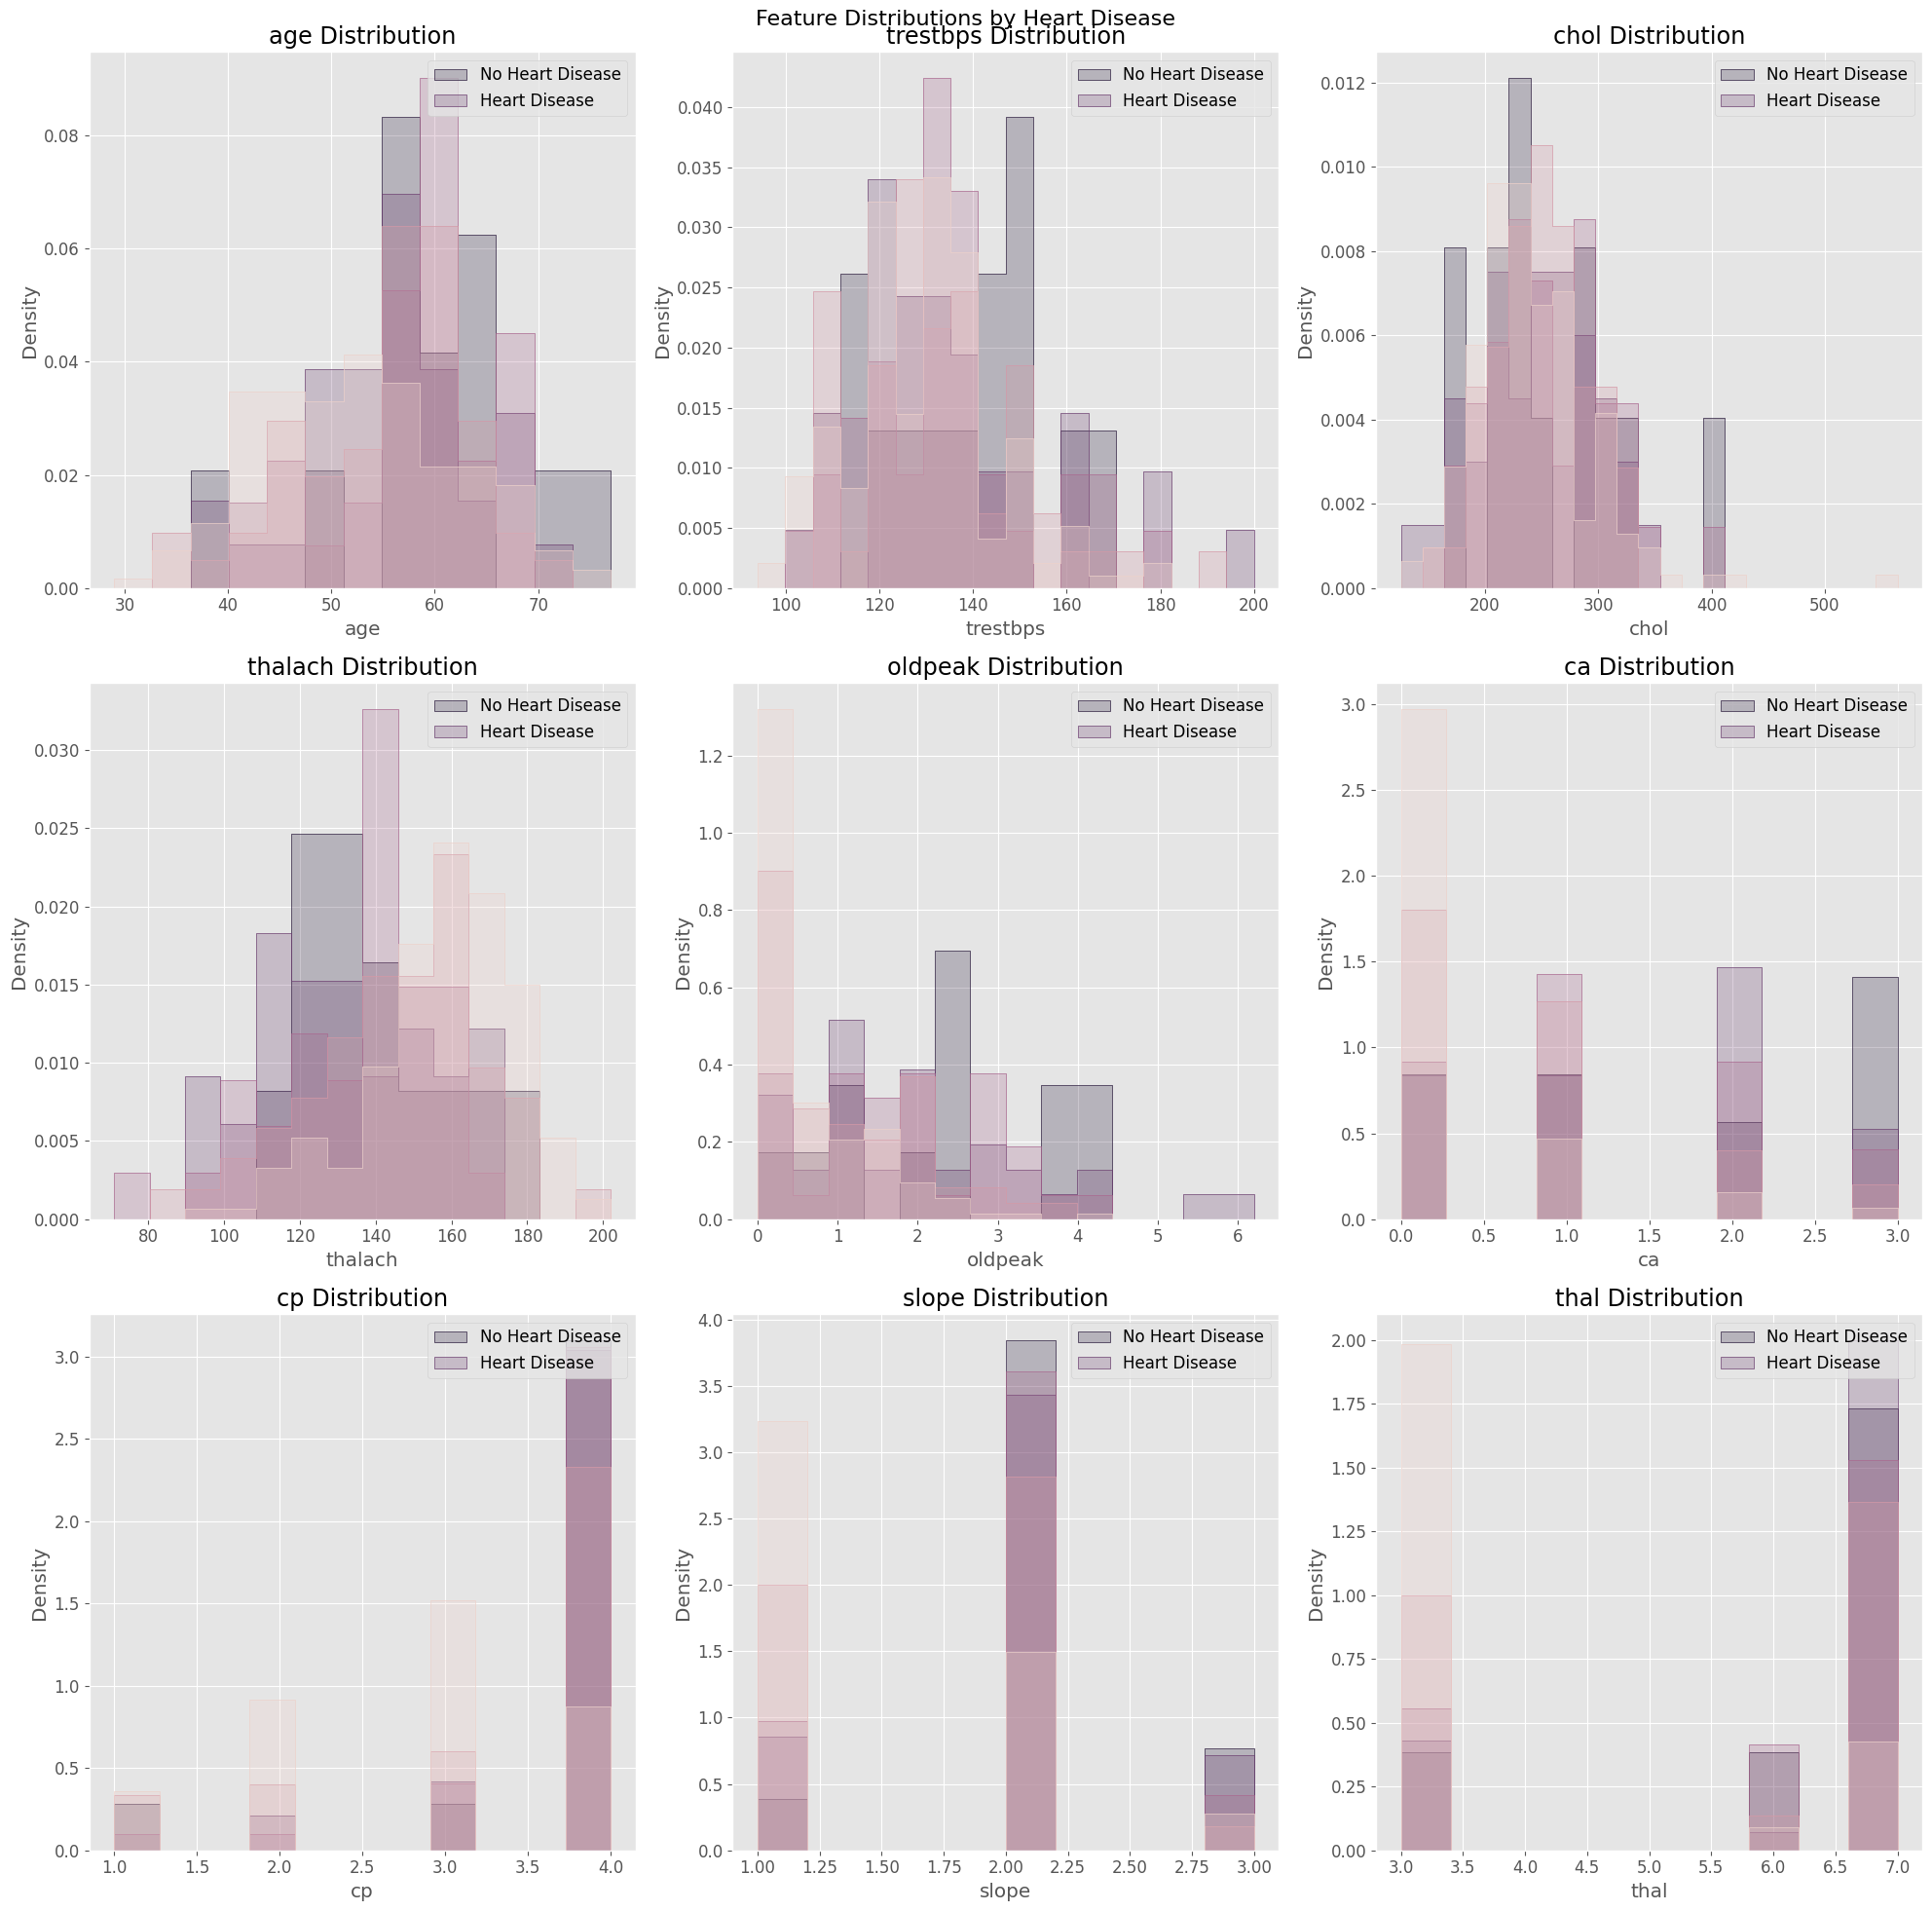

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_imputed is our cleaned dataframe

# Set up the matplotlib figure
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 1. Distribution of Heart Disease
plt.figure()
sns.countplot(data=df_imputed, x='target')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease Present')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Features')
plt.tight_layout()
plt.show()

# 3. Age Distribution by Heart Disease
plt.figure()
sns.histplot(data=df_imputed, x='age', hue='target', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# 4. Heart Disease by Gender
plt.figure()
sns.countplot(data=df_imputed, x='sex', hue='target')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# 5. Chest Pain Type vs Heart Disease
plt.figure()
sns.countplot(data=df_imputed, x='cp', hue='target')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# 6. Cholesterol Levels by Heart Disease
plt.figure()
sns.boxplot(data=df_imputed, x='target', y='chol')
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 7. Resting Blood Pressure by Heart Disease
plt.figure()
sns.boxplot(data=df_imputed, x='target', y='trestbps')
plt.title('Resting Blood Pressure by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 8. Maximum Heart Rate by Heart Disease
plt.figure()
sns.boxplot(data=df_imputed, x='target', y='thalach')
plt.title('Maximum Heart Rate by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 9. ST Depression (Oldpeak) by Heart Disease
plt.figure()
sns.boxplot(data=df_imputed, x='target', y='oldpeak')
plt.title('ST Depression (Oldpeak) by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('ST Depression')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 10. Age vs Maximum Heart Rate
plt.figure()
sns.scatterplot(data=df_imputed, x='age', y='thalach', hue='target')
plt.title('Age vs Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

# 11. Pairplot of Selected Features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df_imputed[selected_features], hue='target')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.tight_layout()
plt.show()

# 12. Feature Distribution by Heart Disease
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Feature Distributions by Heart Disease', fontsize=16)

features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp', 'slope', 'thal']

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(data=df_imputed, x=feature, hue='target', element='step', stat='density', common_norm=False, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()